# Tutorial 07: Intent-Aware Retrieval with INSIDE

This notebook demonstrates how to use INSIDE's intent-aware retrieval system to adapt search strategies based on query type.

## Why Intent-Aware Retrieval?

Different query types require different retrieval strategies:

| Intent | Strategy | Example Query |
|--------|----------|---------------|
| **Factual** | High precision, specific documents | "What is negligence?" |
| **Exploratory** | Diverse results, broad coverage | "Tell me about tort law" |
| **Comparative** | Contrasting perspectives | "Compare negligence vs strict liability" |
| **Procedural** | Sequential, step-by-step | "How to file a negligence claim?" |

## Setup

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import INSIDE components
from src.inside.intent_detector import (
    IntentDetector,
    QueryIntent,
    get_retrieval_strategy,
    analyze_query_characteristics
)

print("✓ Imports successful")

✓ Imports successful


## Part 1: Intent Detection

Let's start by understanding how queries are classified into different intents.

In [2]:
# Create intent detector (using rule-based method)
detector = IntentDetector(method='rules')

# Test queries
test_queries = [
    "What is negligence?",
    "Define duty of care",
    "Tell me about tort law",
    "Explain the history of negligence law",
    "Compare negligence and strict liability",
    "What is the difference between tort and contract law?",
    "How to prove negligence in court?",
    "Steps to file a negligence lawsuit",
]

print("Intent Detection Results:\n")
results = []

for query in test_queries:
    intent = detector.detect_intent(query)
    results.append({'Query': query, 'Intent': intent.value})
    print(f"Query: {query}")
    print(f"  → Intent: {intent.value}\n")

# Create DataFrame for analysis
df_results = pd.DataFrame(results)
print("\nIntent Distribution:")
print(df_results['Intent'].value_counts())

Intent Detection Results:

Query: What is negligence?
  → Intent: factual

Query: Define duty of care
  → Intent: factual

Query: Tell me about tort law
  → Intent: exploratory

Query: Explain the history of negligence law
  → Intent: exploratory

Query: Compare negligence and strict liability
  → Intent: comparative

Query: What is the difference between tort and contract law?
  → Intent: factual

Query: How to prove negligence in court?
  → Intent: procedural

Query: Steps to file a negligence lawsuit
  → Intent: procedural


Intent Distribution:
Intent
factual        3
exploratory    2
procedural     2
comparative    1
Name: count, dtype: int64


## Part 2: Intent-Specific Retrieval Strategies

Each intent type uses a different retrieval strategy.

In [3]:
# Show strategies for each intent
intents = [QueryIntent.FACTUAL, QueryIntent.EXPLORATORY, 
           QueryIntent.COMPARATIVE, QueryIntent.PROCEDURAL]

print("Intent-Specific Retrieval Strategies:\n")
print("=" * 80)

strategy_data = []
for intent in intents:
    strategy = get_retrieval_strategy(intent)
    strategy_data.append({
        'Intent': intent.value,
        'Top-K': strategy['top_k'],
        'Diversity': strategy['diversity'],
        'Rerank Method': strategy['rerank_method'],
        'Description': strategy['description']
    })
    
    print(f"\n{intent.value.upper()}:")
    print(f"  Top-K: {strategy['top_k']} documents")
    print(f"  Diversity: {strategy['diversity']} (0=none, 1=maximum)")
    print(f"  Rerank: {strategy['rerank_method']}")
    print(f"  {strategy['description']}")

# Visualize strategies
df_strategies = pd.DataFrame(strategy_data)
print("\n" + "=" * 80)
print("\nStrategy Summary Table:")
print(df_strategies.to_string(index=False))

Intent-Specific Retrieval Strategies:


FACTUAL:
  Top-K: 3 documents
  Diversity: 0.0 (0=none, 1=maximum)
  Rerank: relevance
  High precision, focused retrieval

EXPLORATORY:
  Top-K: 10 documents
  Diversity: 0.7 (0=none, 1=maximum)
  Rerank: diversity
  Broad coverage, diverse results

COMPARATIVE:
  Top-K: 6 documents
  Diversity: 0.5 (0=none, 1=maximum)
  Rerank: contrast
  Contrasting documents for comparison

PROCEDURAL:
  Top-K: 5 documents
  Diversity: 0.3 (0=none, 1=maximum)
  Rerank: sequential
  Step-by-step relevant documents


Strategy Summary Table:
     Intent  Top-K  Diversity Rerank Method                          Description
    factual      3        0.0     relevance    High precision, focused retrieval
exploratory     10        0.7     diversity      Broad coverage, diverse results
comparative      6        0.5      contrast Contrasting documents for comparison
 procedural      5        0.3    sequential      Step-by-step relevant documents


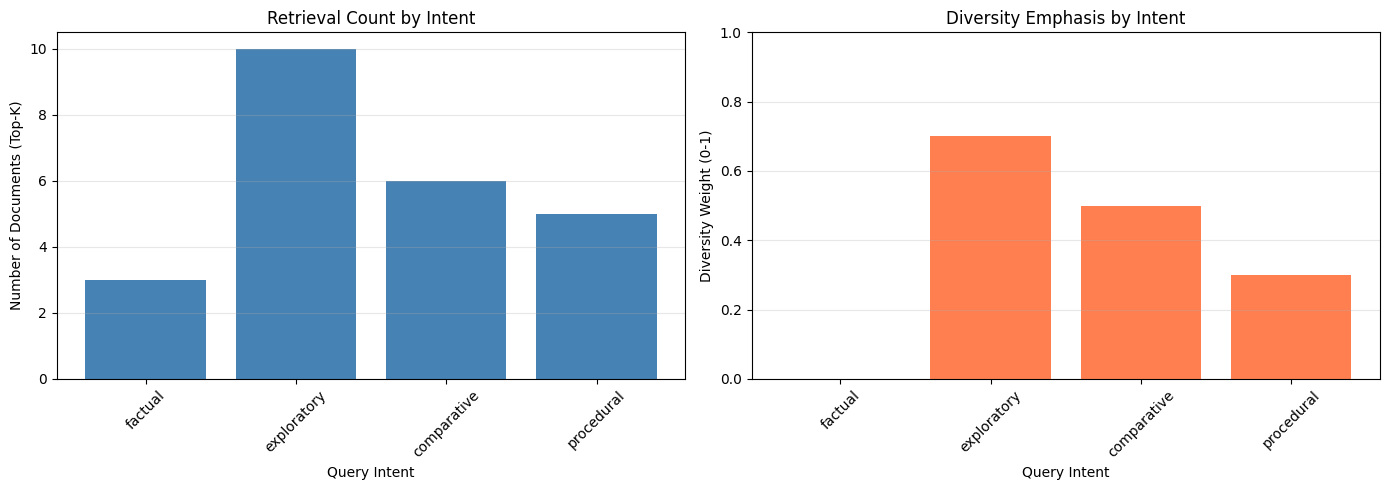

In [4]:
# Visualize strategy parameters
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top-K values
axes[0].bar(df_strategies['Intent'], df_strategies['Top-K'], color='steelblue')
axes[0].set_xlabel('Query Intent')
axes[0].set_ylabel('Number of Documents (Top-K)')
axes[0].set_title('Retrieval Count by Intent')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Diversity weights
axes[1].bar(df_strategies['Intent'], df_strategies['Diversity'], color='coral')
axes[1].set_xlabel('Query Intent')
axes[1].set_ylabel('Diversity Weight (0-1)')
axes[1].set_title('Diversity Emphasis by Intent')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## Part 3: Query Characteristics Analysis

Let's analyze different query characteristics that influence retrieval.

In [5]:
# Analyze query characteristics
print("Query Characteristics Analysis:\n")
print("=" * 80)

char_data = []
for query in test_queries:
    chars = analyze_query_characteristics(query)
    chars['query'] = query
    char_data.append(chars)
    
df_chars = pd.DataFrame(char_data)
print(df_chars[['query', 'length_words', 'has_question_word', 'has_legal_term', 'complexity']].to_string(index=False))

Query Characteristics Analysis:

                                                query  length_words  has_question_word  has_legal_term  complexity
                                  What is negligence?             3               True           False        0.15
                                  Define duty of care             4              False           False        0.20
                               Tell me about tort law             5              False            True        0.25
                Explain the history of negligence law             6              False            True        0.30
              Compare negligence and strict liability             5              False            True        0.25
What is the difference between tort and contract law?             9               True            True        0.45
                    How to prove negligence in court?             6               True           False        0.30
                   Steps to file a negligence l

## Part 4: Confidence Scores

Get confidence scores for each intent type.

Query: 'Tell me about negligence and strict liability'

Intent Confidence Scores:
  exploratory    : 1.000 ██████████████████████████████████████████████████
  factual        : 0.000 
  comparative    : 0.000 
  procedural     : 0.000 


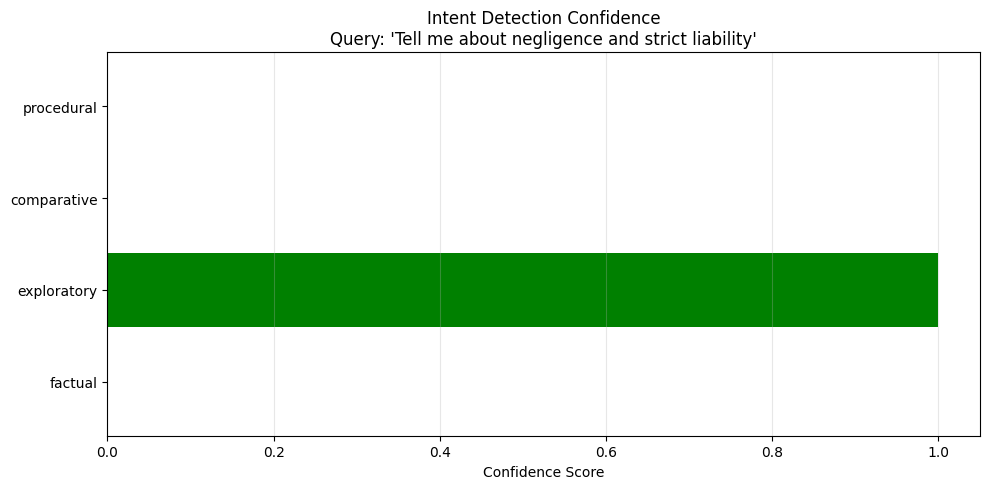

In [6]:
# Example query with ambiguous intent
ambiguous_query = "Tell me about negligence and strict liability"

# Get confidence scores
confidences = detector.get_confidence(ambiguous_query)

print(f"Query: '{ambiguous_query}'\n")
print("Intent Confidence Scores:")
for intent, score in sorted(confidences.items(), key=lambda x: x[1], reverse=True):
    bar = '█' * int(score * 50)
    print(f"  {intent.value:15s}: {score:.3f} {bar}")

# Visualize
plt.figure(figsize=(10, 5))
intents_list = [intent.value for intent in confidences.keys()]
scores_list = list(confidences.values())
colors = ['green' if s == max(scores_list) else 'steelblue' for s in scores_list]

plt.barh(intents_list, scores_list, color=colors)
plt.xlabel('Confidence Score')
plt.title(f"Intent Detection Confidence\nQuery: '{ambiguous_query}'")
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Part 5: Simulated Retrieval Comparison

Let's simulate how different intents would retrieve different numbers of documents.

In [7]:
# Simulate retrieval for different query types
queries_by_intent = {
    QueryIntent.FACTUAL: "What is negligence?",
    QueryIntent.EXPLORATORY: "Tell me about tort law",
    QueryIntent.COMPARATIVE: "Compare negligence and strict liability",
    QueryIntent.PROCEDURAL: "How to file a negligence claim?"
}

print("Simulated Retrieval Results:\n")
print("=" * 80)

for intent, query in queries_by_intent.items():
    detected_intent = detector.detect_intent(query)
    strategy = get_retrieval_strategy(detected_intent)
    
    print(f"\nQuery: '{query}'")
    print(f"Detected Intent: {detected_intent.value}")
    print(f"Strategy: {strategy['description']}")
    print(f"  → Retrieving {strategy['top_k']} documents")
    print(f"  → Diversity weight: {strategy['diversity']}")
    print(f"  → Rerank method: {strategy['rerank_method']}")

Simulated Retrieval Results:


Query: 'What is negligence?'
Detected Intent: factual
Strategy: High precision, focused retrieval
  → Retrieving 3 documents
  → Diversity weight: 0.0
  → Rerank method: relevance

Query: 'Tell me about tort law'
Detected Intent: exploratory
Strategy: Broad coverage, diverse results
  → Retrieving 10 documents
  → Diversity weight: 0.7
  → Rerank method: diversity

Query: 'Compare negligence and strict liability'
Detected Intent: comparative
Strategy: Contrasting documents for comparison
  → Retrieving 6 documents
  → Diversity weight: 0.5
  → Rerank method: contrast

Query: 'How to file a negligence claim?'
Detected Intent: procedural
Strategy: Step-by-step relevant documents
  → Retrieving 5 documents
  → Diversity weight: 0.3
  → Rerank method: sequential


## Part 6: Intent Detection Performance on Custom Data

Test intent detection on your own queries.

In [8]:
# Add your own test queries here
custom_queries = [
    # Add your queries...
    "What is the statute of limitations for negligence?",
    "Explain comparative negligence",
    "Negligence versus intentional torts",
    "Guide to proving breach of duty",
]

print("Custom Query Testing:\n")
for query in custom_queries:
    intent = detector.detect_intent(query)
    strategy = get_retrieval_strategy(intent)
    
    print(f"Query: {query}")
    print(f"  Intent: {intent.value}")
    print(f"  Strategy: Retrieve {strategy['top_k']} docs, diversity={strategy['diversity']}\n")

Custom Query Testing:

Query: What is the statute of limitations for negligence?
  Intent: factual
  Strategy: Retrieve 3 docs, diversity=0.0

Query: Explain comparative negligence
  Intent: exploratory
  Strategy: Retrieve 10 docs, diversity=0.7

Query: Negligence versus intentional torts
  Intent: comparative
  Strategy: Retrieve 6 docs, diversity=0.5

Query: Guide to proving breach of duty
  Intent: procedural
  Strategy: Retrieve 5 docs, diversity=0.3



## Part 7: Integration with Actual Retrieval

Here's how to integrate with the actual retrieval pipeline (requires indexed documents).

In [9]:
# Example code for actual retrieval (commented out - requires setup)
'''
from src.retrieval.retriever import LegalRetriever
from src.retrieval.inside_retriever import INSIDERetriever

# Load base retriever
base_retriever = LegalRetriever(
    index_path="data/embeddings/legal_index.faiss",
    embedding_model_name="sentence-transformers/all-mpnet-base-v2"
)

# Create INSIDE retriever
inside_retriever = INSIDERetriever(
    base_retriever=base_retriever,
    enable_diversity=True
)

# Retrieve with intent awareness
result = inside_retriever.retrieve(
    query="Compare negligence and strict liability",
    return_metadata=True
)

print(f"Retrieved {result.num_retrieved} documents")
print(f"Intent: {result.query_intent}")
print(f"Strategy: {result.strategy_used}")
for i, (doc, score) in enumerate(zip(result.documents, result.scores), 1):
    print(f"  {i}. Score={score:.3f}: {doc[:100]}...")
'''

print("Actual retrieval integration code provided above.")
print("Uncomment and run when you have indexed documents.")

Actual retrieval integration code provided above.
Uncomment and run when you have indexed documents.


## Summary

In this tutorial, you learned:

1. **Intent Detection**: How to automatically classify queries into intent types
2. **Retrieval Strategies**: Different strategies for different intents
3. **Query Analysis**: Characteristics that influence retrieval
4. **Confidence Scores**: Understanding detection confidence
5. **Integration**: How to integrate with actual retrieval systems

## Key Takeaways

- **Factual queries** → High precision, few documents
- **Exploratory queries** → High diversity, many documents
- **Comparative queries** → Contrasting perspectives
- **Procedural queries** → Sequential, step-by-step documents

## Configuration

Intent strategies can be customized in `configs/retrieval_config.yaml`:

```yaml
inside:
  enabled: true
  intent_strategies:
    factual:
      top_k: 3
      diversity_weight: 0.0
    exploratory:
      top_k: 10
      diversity_weight: 0.7
    # ... etc
```

## Next Steps

- Tutorial 08: Combined Self-RAG + INSIDE System
- Experiment with custom intent detection models
- Evaluate retrieval quality per intent type